In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
print(os.listdir('../input/titanic'))

# Any results you write to the current directory are saved as output.

/kaggle/input/titanic/test.csv
/kaggle/input/titanic/train.csv
/kaggle/input/titanic/gender_submission.csv
['test.csv', 'train.csv', 'gender_submission.csv']


In [2]:
from sklearn import datasets, cluster
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn import preprocessing

In [4]:
data = pd.read_csv('../input/titanic/train.csv')
data = data[:50]
#visualising 900 data points will clutter visualisations. 
max_clusters = 2
data['Age'].fillna(np.mean(data['Age']), inplace = True) 
data['Fare'].fillna(np.mean(data['Fare']), inplace = True)

In [5]:
data['Age'] = preprocessing.scale(data['Age'])
data['Fare'] = preprocessing.scale(data['Fare'])

In [6]:
centroid_list = []
cols = ['Age','Fare']
for i in range(max_clusters):
    OneDict = {}
    randomIndex = random.randrange(0, data.shape[0]) 
    for col in cols:
        OneDict[col] = data.iloc[randomIndex][col]
    centroid_list.append(OneDict)

In [7]:
max_iter =  7
iters =  0
cluster_train=[None]*len(data[:])
while iters < max_iter:
    for i in range(data.shape[0]):

        # step 1 begins:
        cluster_index =  0
        mini = 9999
        for centroid in centroid_list:
            print(list(centroid.values()))
            print(type(data[cols].iloc[i]))
            dist = np.linalg.norm( np.array(list(centroid.values())) - np.array(data[cols].iloc[i]) )
            if dist < mini:
                mini = dist
                cluster_train[i] = cluster_index
            cluster_index += 1
        iters+=1

[-1.0062322090021134, -0.48307908426473045]
<class 'pandas.core.series.Series'>
[0.26348760936756377, -0.23852187909648606]
<class 'pandas.core.series.Series'>
[-1.0062322090021134, -0.48307908426473045]
<class 'pandas.core.series.Series'>
[0.26348760936756377, -0.23852187909648606]
<class 'pandas.core.series.Series'>
[-1.0062322090021134, -0.48307908426473045]
<class 'pandas.core.series.Series'>
[0.26348760936756377, -0.23852187909648606]
<class 'pandas.core.series.Series'>
[-1.0062322090021134, -0.48307908426473045]
<class 'pandas.core.series.Series'>
[0.26348760936756377, -0.23852187909648606]
<class 'pandas.core.series.Series'>
[-1.0062322090021134, -0.48307908426473045]
<class 'pandas.core.series.Series'>
[0.26348760936756377, -0.23852187909648606]
<class 'pandas.core.series.Series'>
[-1.0062322090021134, -0.48307908426473045]
<class 'pandas.core.series.Series'>
[0.26348760936756377, -0.23852187909648606]
<class 'pandas.core.series.Series'>
[-1.0062322090021134, -0.483079084264730

(50, 12)


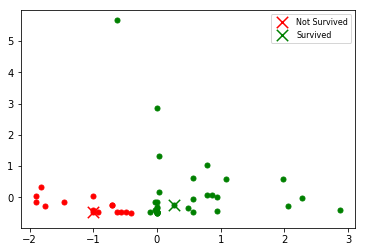

In [8]:
colours  = ["r.", "g."]
print(data.shape)
for i in range(data.shape[0]):
    plt.plot(data['Age'].iloc[i], data['Fare'].iloc[i], colours[cluster_train[i]], markersize = 10)

p1_1 = centroid_list[0]['Age']
p1_2 = centroid_list[0]['Fare']
p2_1 = centroid_list[1]['Age']
p2_2 = centroid_list[1]['Fare']
plt1=plt.scatter(p1_1,p1_2, color = 'red',marker  = 'x',s = 130)
plt2=plt.scatter(p2_1,p2_2, color = 'green',marker = 'x',s =130)
plt.legend((plt1, plt2),
           ('Not Survived', 'Survived'),
           fontsize=8)
plt.show()